In [82]:
import pandas as pd
import math
import random as rd
import matplotlib.pyplot as plt
import numpy as np


In [83]:



clientes = int(input());
tempo_medio_entre_chegadas = float(input());
tempo_atendimeno =  float(input());

l = 1 / tempo_medio_entre_chegadas;
u = 1 / tempo_atendimeno;
p = l/u;

tabel = pd.DataFrame({'Dados':[clientes , tempo_medio_entre_chegadas , tempo_atendimeno , l , u , p]})

tabel.index = ['Nº de Clientes' , 'Tempo médio entre chegadas /minuto', 'Tempo de atendimento / min' , 'Taxa de chegada  (λ)' , 'Nível de Serviço (μ)' , 'ρ']




print(tabel)


                                      Dados
Nº de Clientes                      10000.0
Tempo médio entre chegadas /minuto      1.0
Tempo de atendimento / min              0.5
Taxa de chegada  (λ)                    1.0
Nível de Serviço (μ)                    2.0
ρ                                       0.5


In [84]:
def generate_simulation(dados):
    
    ## ri = intervalo de tempo entre chegadas
    ## si = tempo de atendimento(duração)
    ## ai = instante da chegada 
    ## bi = inicio do atendimento
    ## ei = fim de atendimento 
    ## wi = tempo de espera na fila
    ## ui = tempo total no sistema
    ## oi = ociosidade do servidor simulado
    ## wq = tempo médio de fila simulado
    ri =0
    si =0
    ai =0
    bi =0 
    ei =0 
    wi =0 
    ui =0 
    oi =0
    wq =0
    m= 0
    dados.loc[0] = [0,0,0,0,0,0,0,0,0,0]

    for i in range(1,clientes):
    
    
    
       if(i > 0):
       
        ln_ri = (math.log (1-(rd.uniform(0,l)/l))) * (-1)
        
        ln_si = (math.log (1-(rd.uniform(0,u)/u))) * (-1)
        
        ri = ln_ri/l
        
        si = ln_si/u
     
       else:
        
         ri =0
         si =0
    
       ai = ri + ai
       
       bi = max(ai,ei)
       
       oi = bi - ei
       
       ei = bi + si
       
       wi = bi-ai
       
       ui = ei - bi
       
       wq +=wi
  
       if(i>0):
      
         m = wq / i
                
       dados.loc[i] = [i,ri,si,ai,bi,ei,wi,ui,oi,m]
    
    
    

In [85]:
def generate_frequency_plots(dados, wq_teorico):
    
    
   
    
    
    dados_aux_ri = pd.DataFrame(dados["Intervalo de tempo entre chegadas"])
    dados_aux_si = pd.DataFrame(dados["Tempo de atendimento(duração)"])
    dados_aux_wi = pd.DataFrame(dados["Tempo de espera na fila"])
    dados_aux_ui = pd.DataFrame(dados["Tempo Total no Sistema"])
    dados_aux_oi = pd.DataFrame(dados["Ociosidade Servidor Simulado"])
    dados_aux_wq = pd.DataFrame(dados["Tempo médio da fila simulado"])
    
    
    
    
    intervalos = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11.0, 11.5, 12, 12.5, 13]

    label_chegada = ['0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.5', '5.5-6.0', '6.0-6.5', '6.5-7.0', '7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.0', '9.0-9.5', '9.5-10.0', '10.0-10.5', '10.5-11.0', '11.0-11.5', '11.5-12.0', '12.0-12.5', '12.5-13.0']

    
    dados_aux_ri['Intervalos'] = pd.cut(dados_aux_ri["Intervalo de tempo entre chegadas"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_si['Intervalos'] = pd.cut(dados_aux_si["Tempo de atendimento(duração)"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wi['Intervalos'] = pd.cut(dados_aux_wi["Tempo de espera na fila"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_ui['Intervalos'] = pd.cut(dados_aux_ui["Tempo Total no Sistema"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_oi['Intervalos'] = pd.cut(dados_aux_oi["Ociosidade Servidor Simulado"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wq['Intervalos'] = pd.cut(dados_aux_wq["Tempo médio da fila simulado"],bins=intervalos,labels=label_chegada, right=False)
    
    freq_ri = dados_aux_ri['Intervalos'].value_counts().sort_index()
    freq_si = dados_aux_si['Intervalos'].value_counts().sort_index()
    freq_wi = dados_aux_wi['Intervalos'].value_counts().sort_index()
    freq_ui = dados_aux_ui['Intervalos'].value_counts().sort_index()
    freq_oi = dados_aux_oi['Intervalos'].value_counts().sort_index()
    freq_wq = dados_aux_wq['Intervalos'].value_counts().sort_index()
    
    
    plt.figure(figsize=(10, 10))
    freq_ri.plot(kind='bar', title='Tempo entra chegadas',color = 'blue')
    plt.xlabel('Intervalos de tempo de entra chegadas')
    plt.ylabel('Frequência')
    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_si.plot(kind='bar', title='Tempo de atendimento',color = 'green')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show() 

    plt.figure(figsize=(10, 10))
    freq_wi.plot(kind='bar', title='Tempo de espera na fila',color = 'red')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_ui.plot(kind='bar', title='Tempo total do sistema', color = 'purple')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_oi.plot(kind='bar', title='Ociosidade Servidor Simulado', color = 'orange')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

     
    
    plt.figure(figsize=(10, 10))
    
    x = np.arange(1,len(dados_aux_wq['Tempo médio da fila simulado'])+1)
    
    wq_simulado =  dados['Tempo médio da fila simulado']
    
    wq_teorico = np.full(len(wq_simulado), wq_teorico)
    
    
    plt.plot(x, wq_simulado, label='Tempo médio da fila' , color = 'blue', linewidth=2)
    plt.plot(x,wq_teorico, label = 'Tempo médio da fila Teórico', color='red', linestyle='--',linewidth=2)
    plt.title("Tempo médio da fila simulado x Tempo médio da fila teórico", fontsize = 12 , fontweight = 'bold' , pad=10)
    plt.xlabel('Numero de observações')
    plt.ylabel('Tempo médio de fila')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.show()
    
    
    
    


        
        
                
        
    
    
    

In [86]:
dados_simulacao_1 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_2 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_3 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_4 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_5 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])

In [87]:
generate_simulation(dados_simulacao_1)
dados_simulacao_1

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,5.157878,0.120424,5.157878,5.157878,5.278302,0.000000,0.120424,5.157878,0.000000
2,2.0,0.473123,0.151807,5.631001,5.631001,5.782808,0.000000,0.151807,0.352699,0.000000
3,3.0,0.485639,0.241890,6.116640,6.116640,6.358530,0.000000,0.241890,0.333833,0.000000
4,4.0,1.190151,0.214846,7.306792,7.306792,7.521637,0.000000,0.214846,0.948262,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,0.393504,0.234509,9907.378675,9907.378675,9907.613184,0.000000,0.234509,0.203527,0.508986
9996,9996.0,0.897640,0.422173,9908.276315,9908.276315,9908.698489,0.000000,0.422173,0.663132,0.508935
9997,9997.0,0.150365,0.083465,9908.426681,9908.698489,9908.781954,0.271808,0.083465,0.000000,0.508911
9998,9998.0,0.709578,0.305847,9909.136259,9909.136259,9909.442106,0.000000,0.305847,0.354305,0.508860


In [88]:
generate_simulation(dados_simulacao_2)
dados_simulacao_2

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.375243,0.410516,0.375243,0.375243,0.785760,0.000000,0.410516,0.375243,0.000000
2,2.0,0.557287,0.076330,0.932531,0.932531,1.008861,0.000000,0.076330,0.146771,0.000000
3,3.0,0.271106,0.452222,1.203637,1.203637,1.655859,0.000000,0.452222,0.194777,0.000000
4,4.0,1.958925,0.254187,3.162562,3.162562,3.416749,0.000000,0.254187,1.506703,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,1.296169,1.360220,10003.235410,10004.885465,10006.245684,1.650054,1.360220,0.000000,0.534899
9996,9996.0,0.363667,0.665153,10003.599077,10006.245684,10006.910837,2.646607,0.665153,0.000000,0.535110
9997,9997.0,0.834104,0.443671,10004.433181,10006.910837,10007.354508,2.477656,0.443671,0.000000,0.535304
9998,9998.0,1.481508,1.433012,10005.914689,10007.354508,10008.787520,1.439819,1.433012,0.000000,0.535395


In [89]:
generate_simulation(dados_simulacao_3)
dados_simulacao_3

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.595397,0.525345,0.595397,0.595397,1.120742,0.000000,0.525345,0.595397,0.000000
2,2.0,0.003561,0.594291,0.598958,1.120742,1.715033,0.521784,0.594291,0.000000,0.260892
3,3.0,1.318843,0.188279,1.917801,1.917801,2.106080,0.000000,0.188279,0.202768,0.173928
4,4.0,0.297183,1.215164,2.214984,2.214984,3.430148,0.000000,1.215164,0.108904,0.130446
...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,0.006377,1.021179,9921.771094,9922.127277,9923.148456,0.356183,1.021179,0.000000,0.486666
9996,9996.0,0.144404,0.801898,9921.915498,9923.148456,9923.950354,1.232958,0.801898,0.000000,0.486741
9997,9997.0,0.859649,0.342494,9922.775147,9923.950354,9924.292847,1.175207,0.342494,0.000000,0.486810
9998,9998.0,0.202590,0.481677,9922.977737,9924.292847,9924.774525,1.315110,0.481677,0.000000,0.486892


In [90]:
generate_simulation(dados_simulacao_4)
dados_simulacao_4

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.692411,0.118543,0.692411,0.692411,0.810953,0.000000,0.118543,0.692411,0.000000
2,2.0,0.144023,0.216977,0.836434,0.836434,1.053411,0.000000,0.216977,0.025481,0.000000
3,3.0,1.800463,0.055840,2.636897,2.636897,2.692737,0.000000,0.055840,1.583486,0.000000
4,4.0,4.012213,1.461487,6.649111,6.649111,8.110598,0.000000,1.461487,3.956374,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,0.422355,0.158312,9934.217397,9934.217397,9934.375709,0.000000,0.158312,0.406301,0.486544
9996,9996.0,1.071850,0.917880,9935.289247,9935.289247,9936.207127,0.000000,0.917880,0.913538,0.486495
9997,9997.0,0.197212,1.117455,9935.486459,9936.207127,9937.324582,0.720668,1.117455,0.000000,0.486519
9998,9998.0,1.112761,0.556402,9936.599220,9937.324582,9937.880984,0.725362,0.556402,0.000000,0.486543


In [91]:
generate_simulation(dados_simulacao_5)
dados_simulacao_5


,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,1.261525,1.607861,1.261525,1.261525,2.869386,0.000000,1.607861,1.261525,0.000000
2,2.0,0.226972,0.152028,1.488497,2.869386,3.021413,1.380889,0.152028,0.000000,0.690444
3,3.0,0.398412,0.867565,1.886909,3.021413,3.888979,1.134504,0.867565,0.000000,0.838464
4,4.0,0.666362,0.706394,2.553271,3.888979,4.595373,1.335708,0.706394,0.000000,0.962775
...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,0.370301,0.070484,9896.738508,9896.738508,9896.808993,0.000000,0.070484,0.180144,0.482869
9996,9996.0,1.192081,0.901953,9897.930589,9897.930589,9898.832542,0.000000,0.901953,1.121596,0.482821
9997,9997.0,0.001174,0.274764,9897.931763,9898.832542,9899.107306,0.900779,0.274764,0.000000,0.482863
9998,9998.0,0.167879,1.250254,9898.099642,9899.107306,9900.357560,1.007664,1.250254,0.000000,0.482915


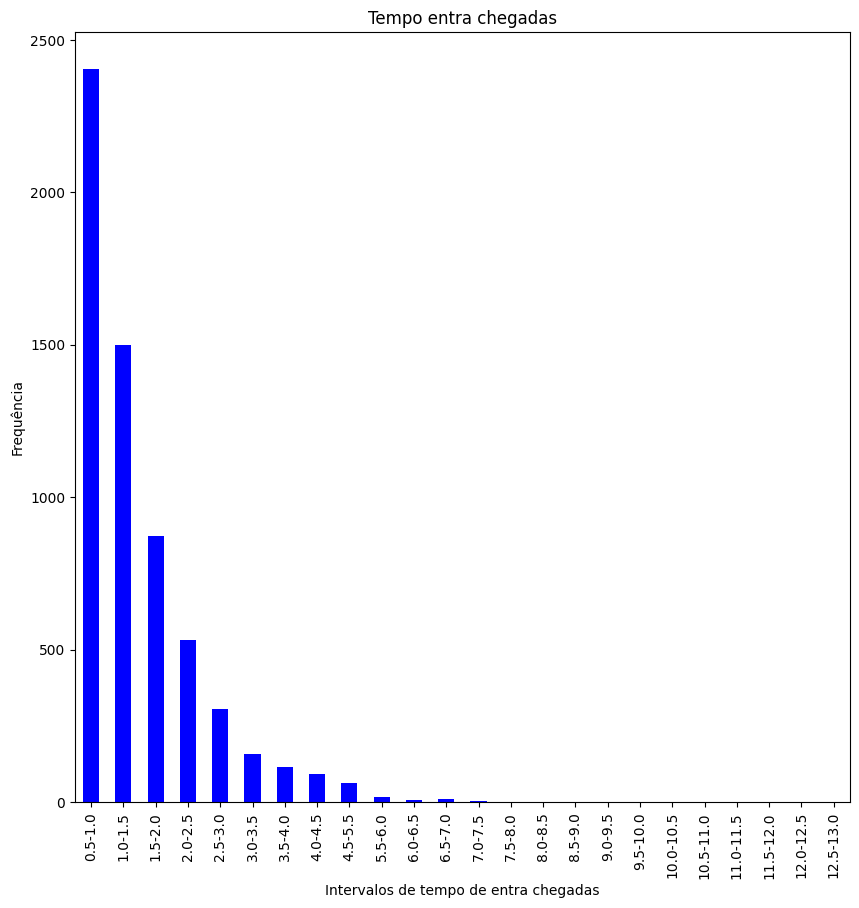

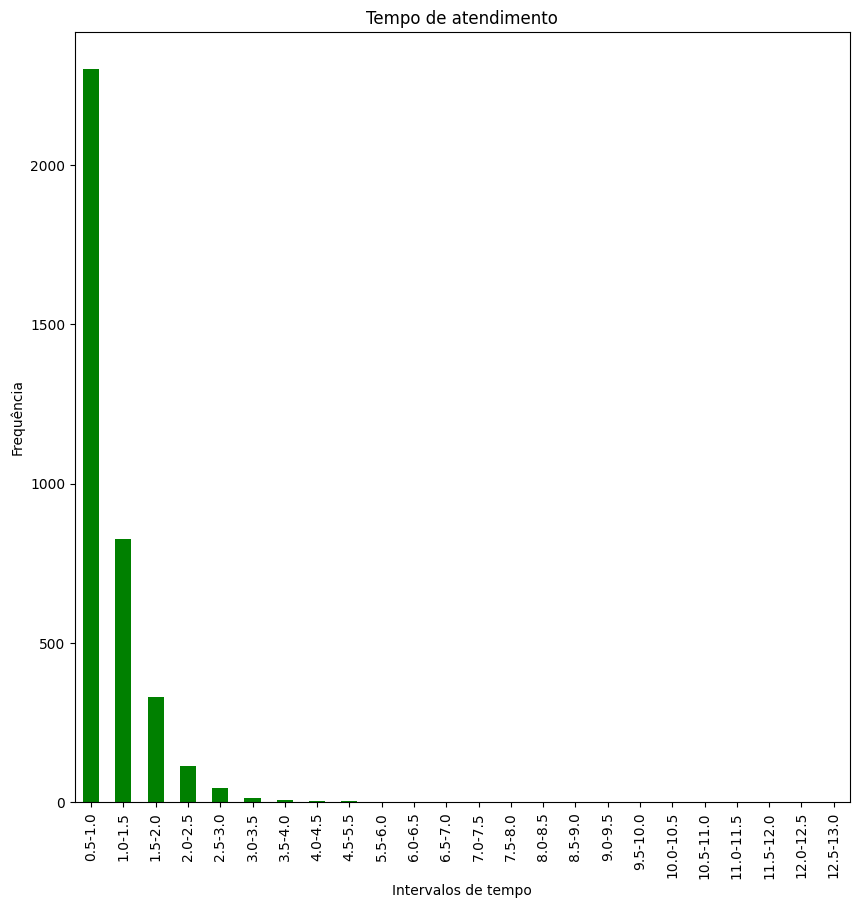

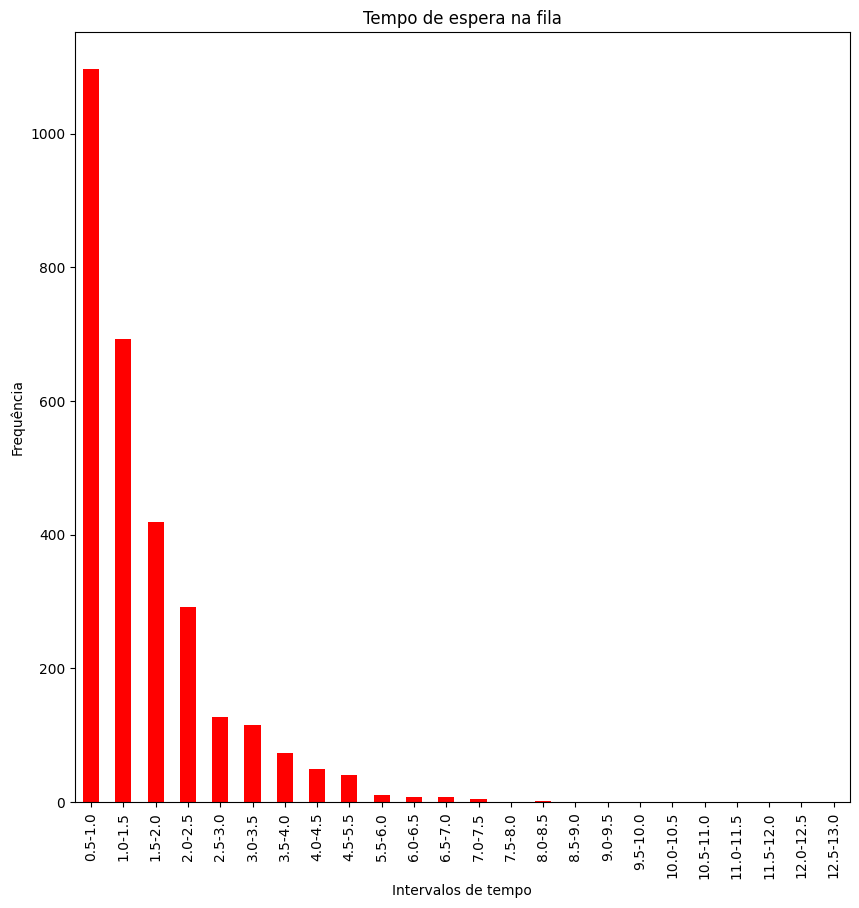

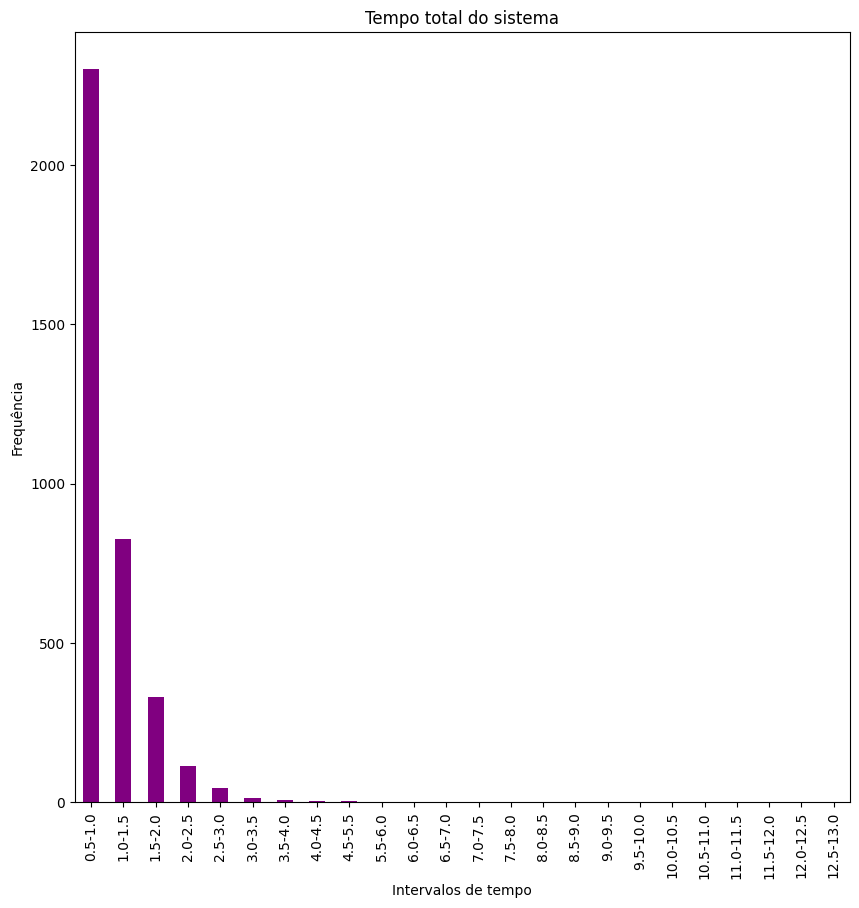

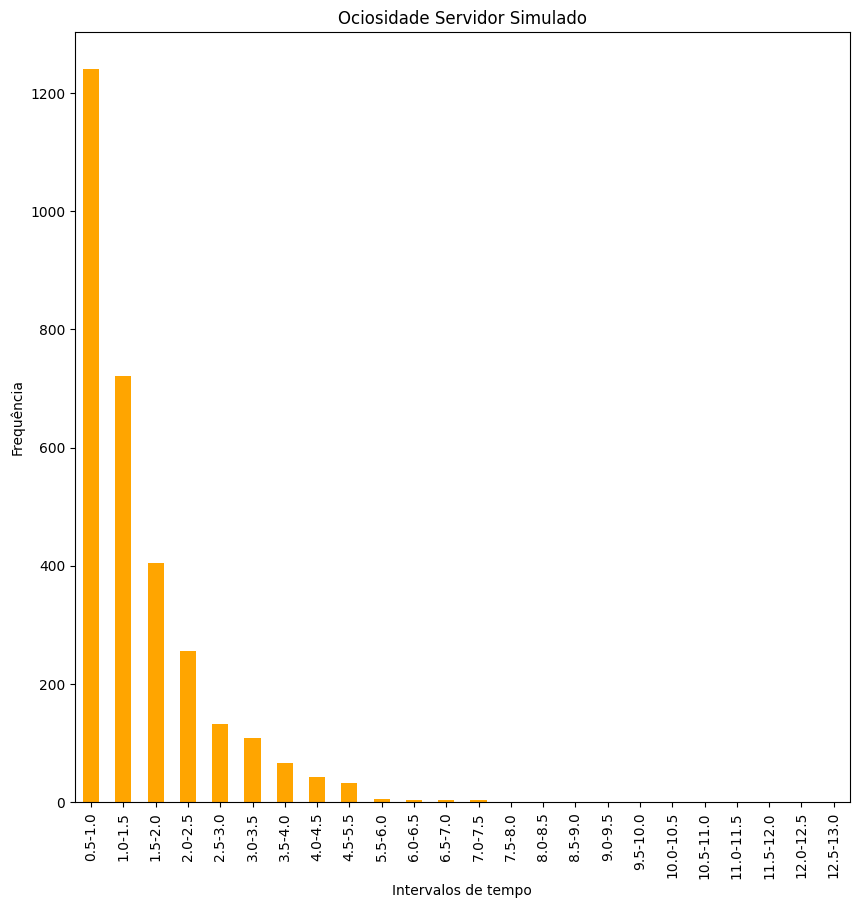

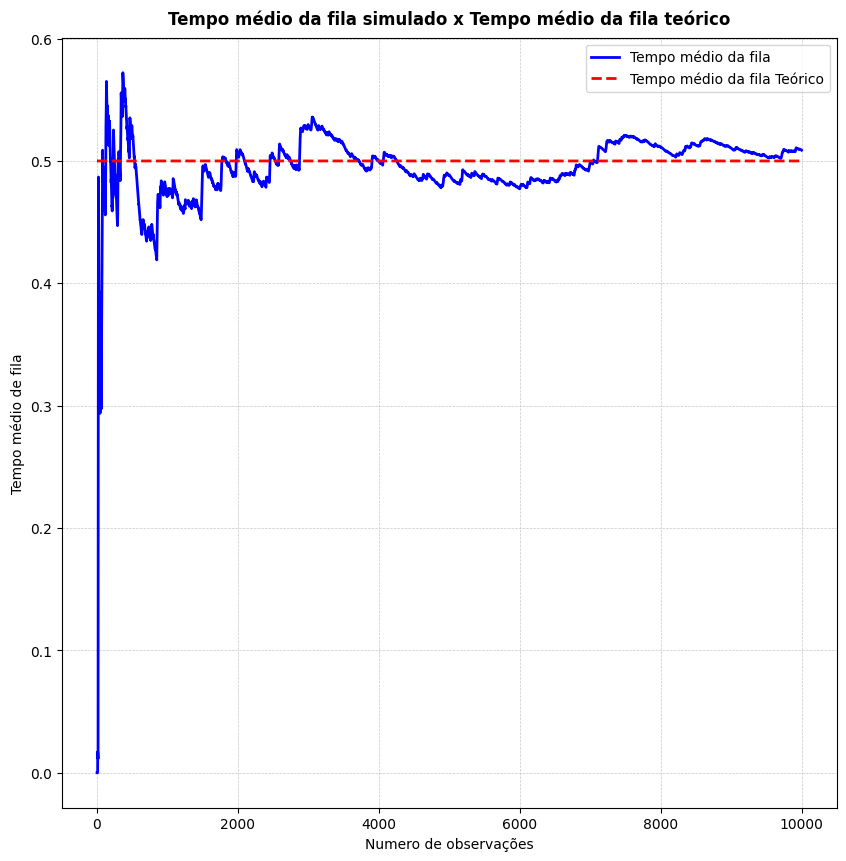

In [92]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_1,wq)

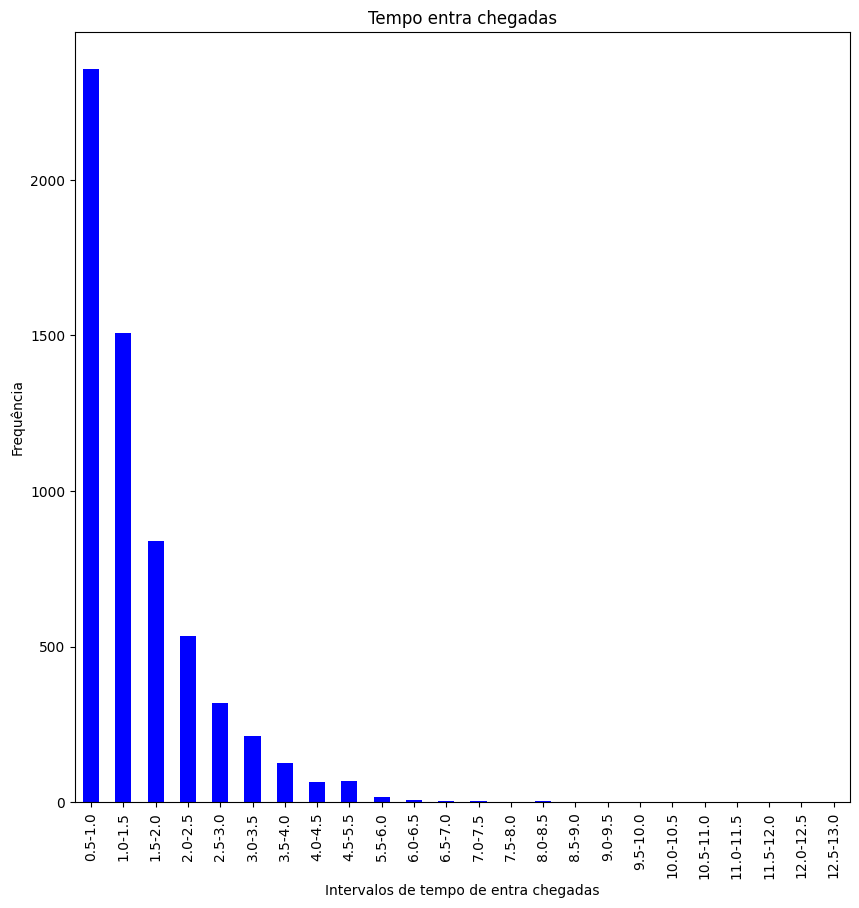

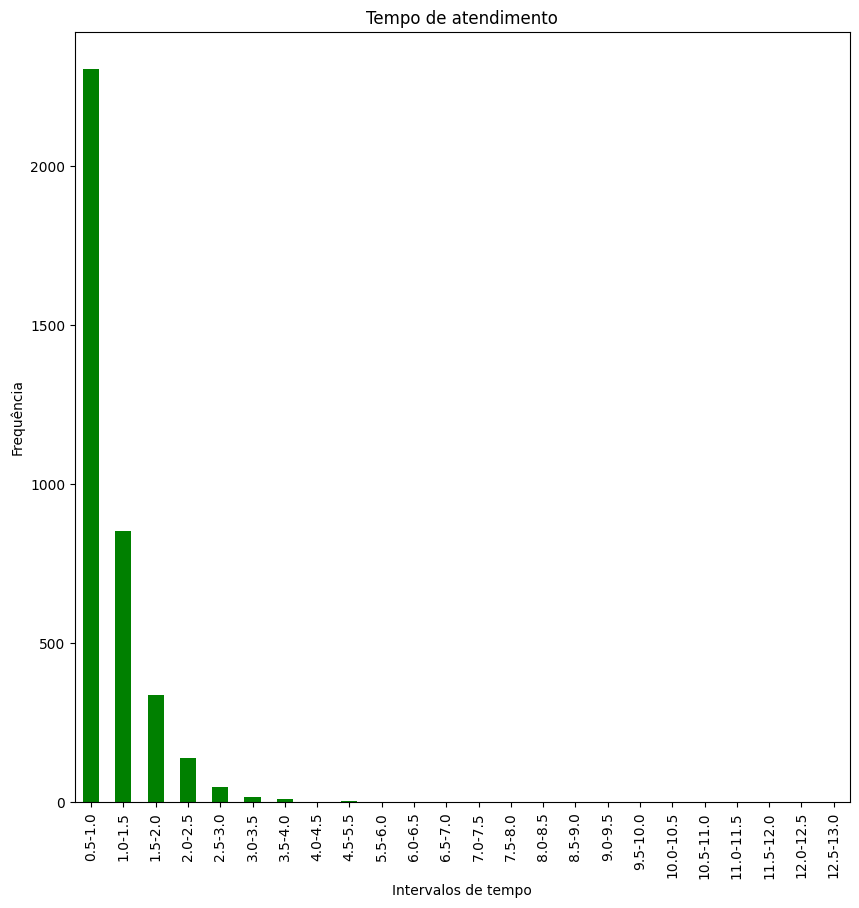

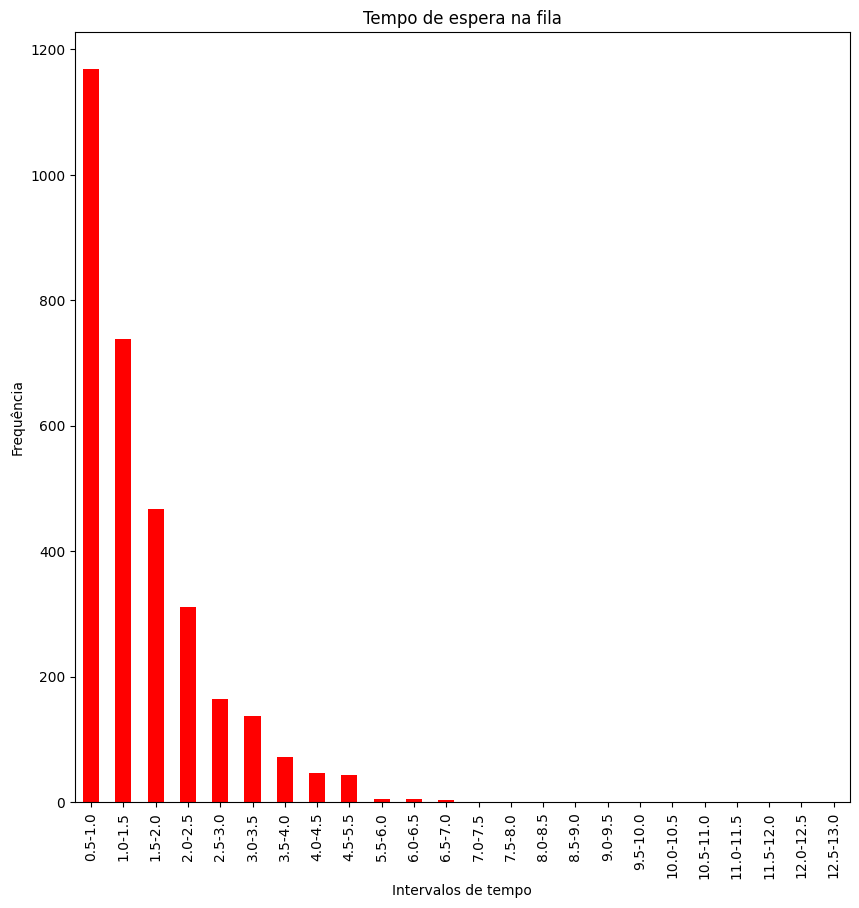

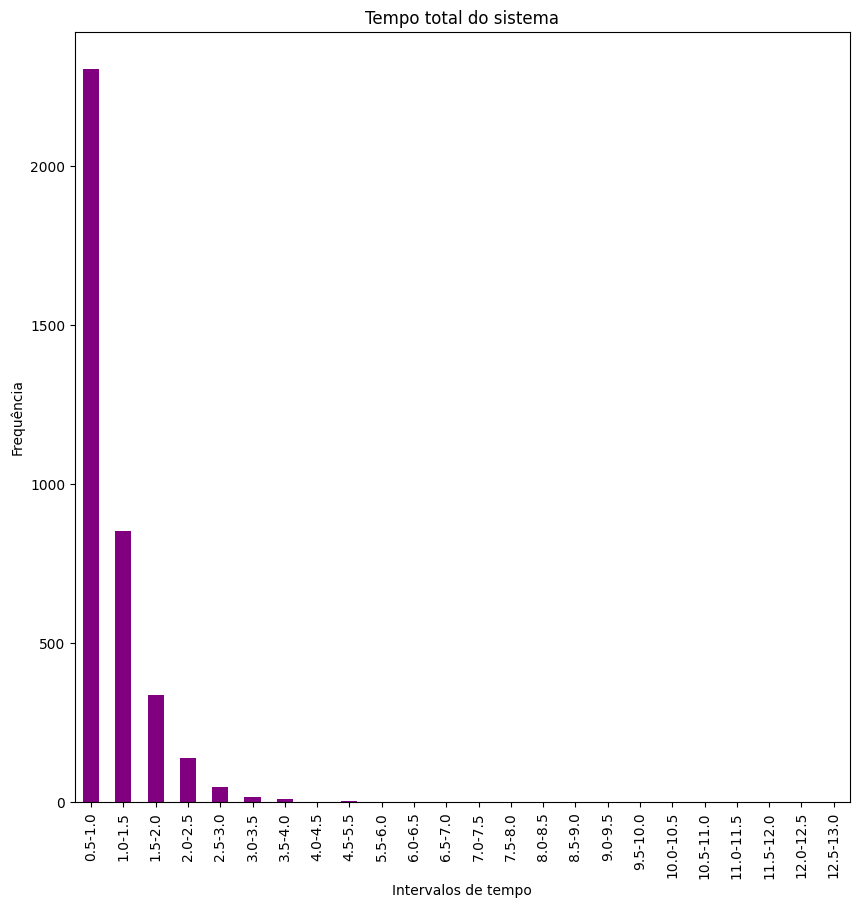

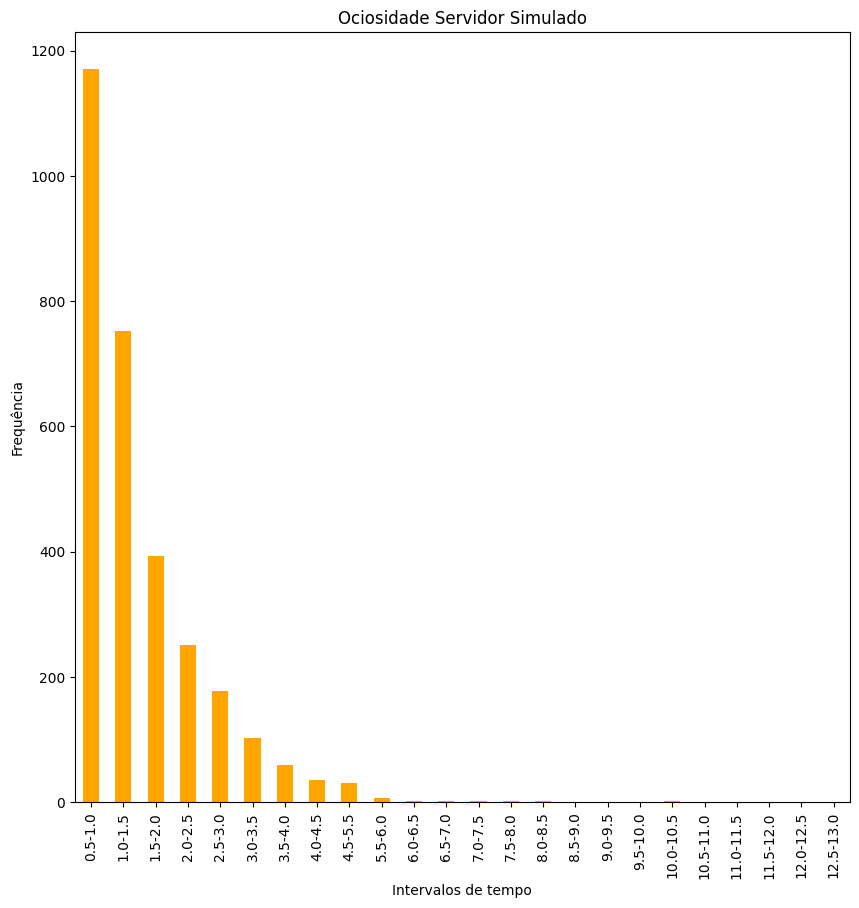

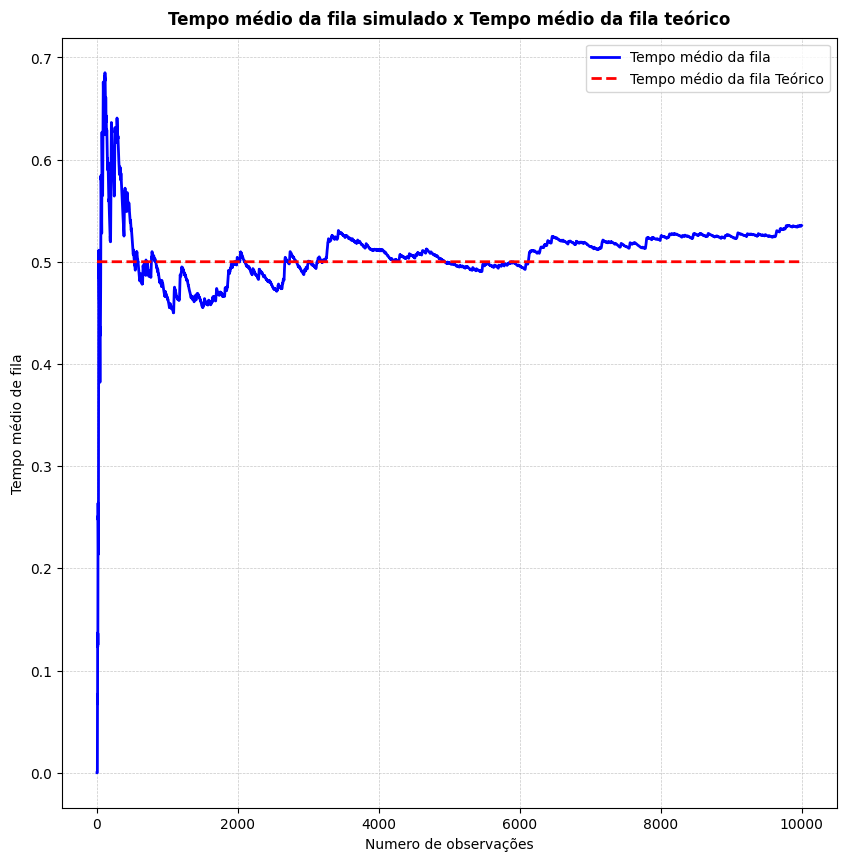

In [93]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_2,wq)

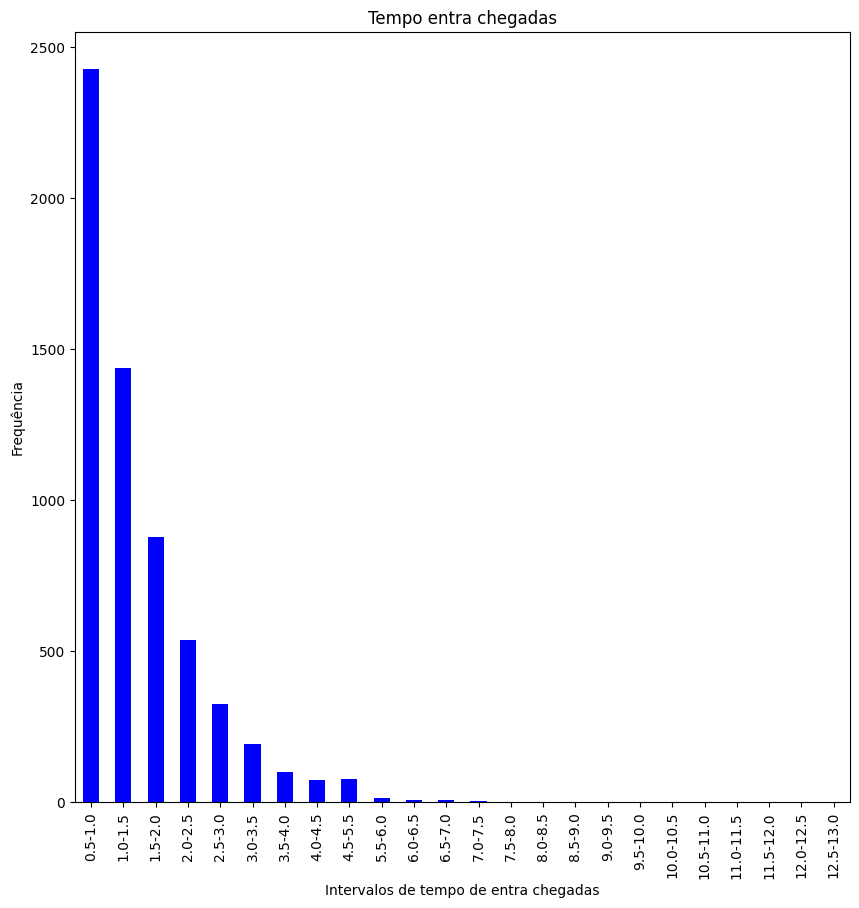

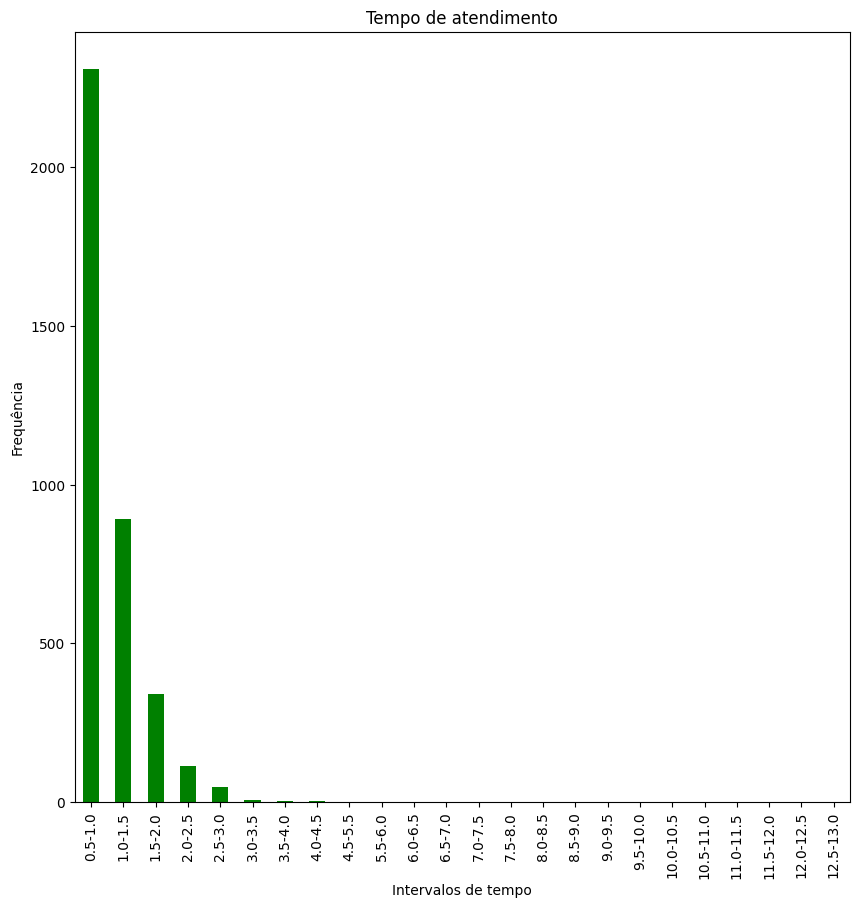

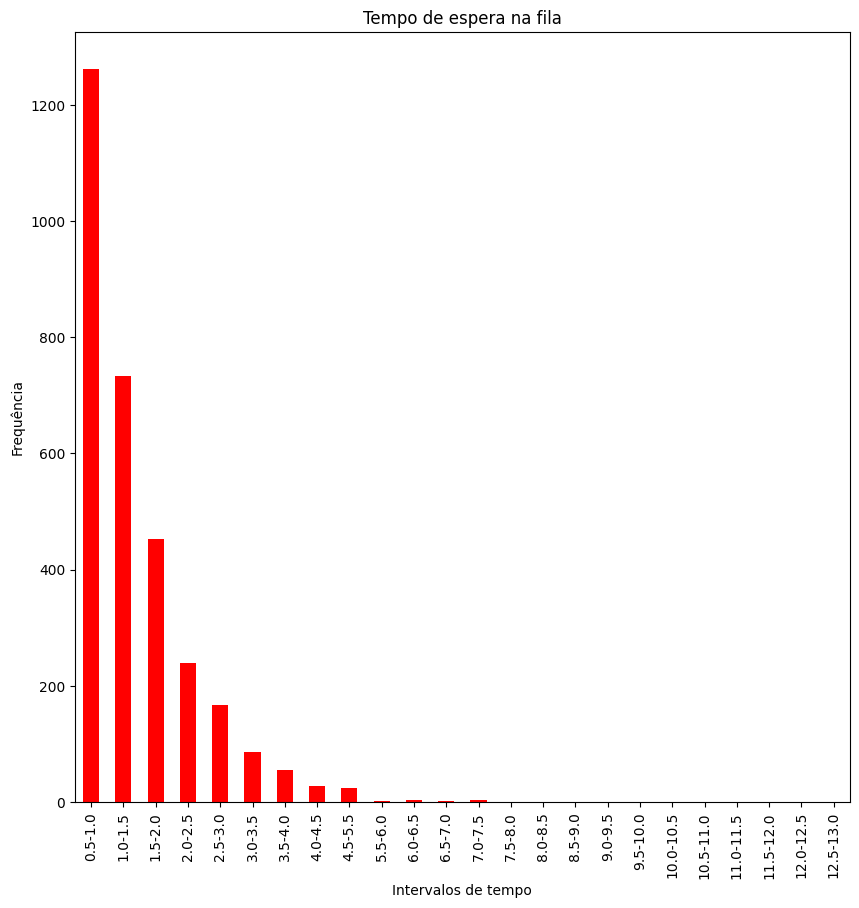

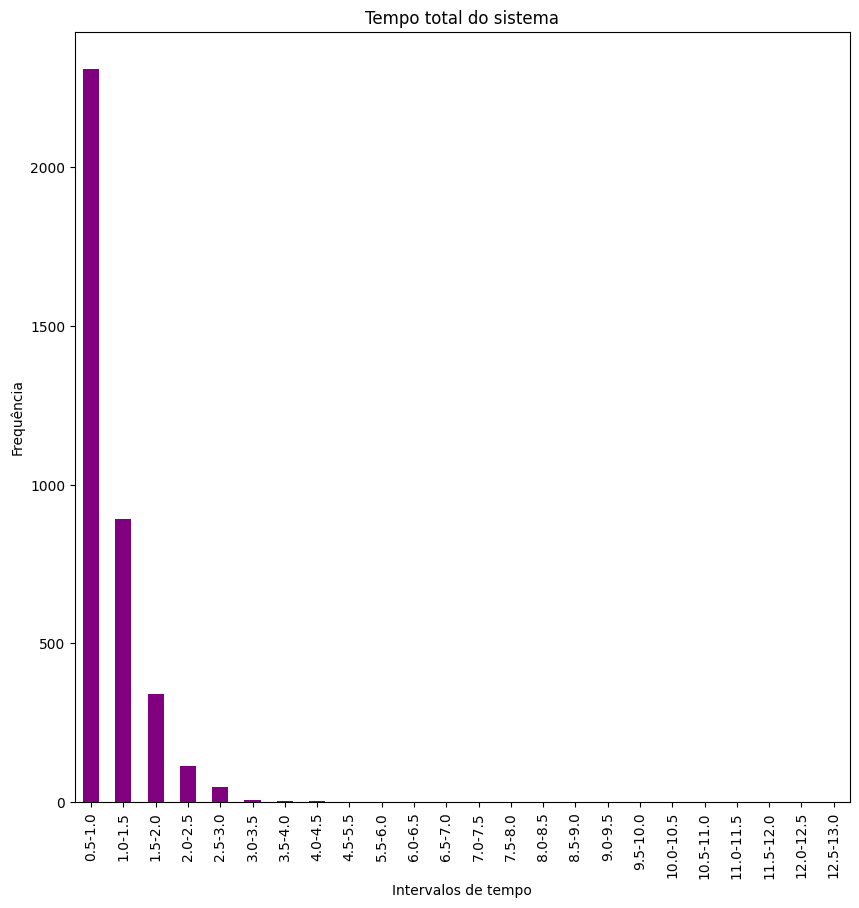

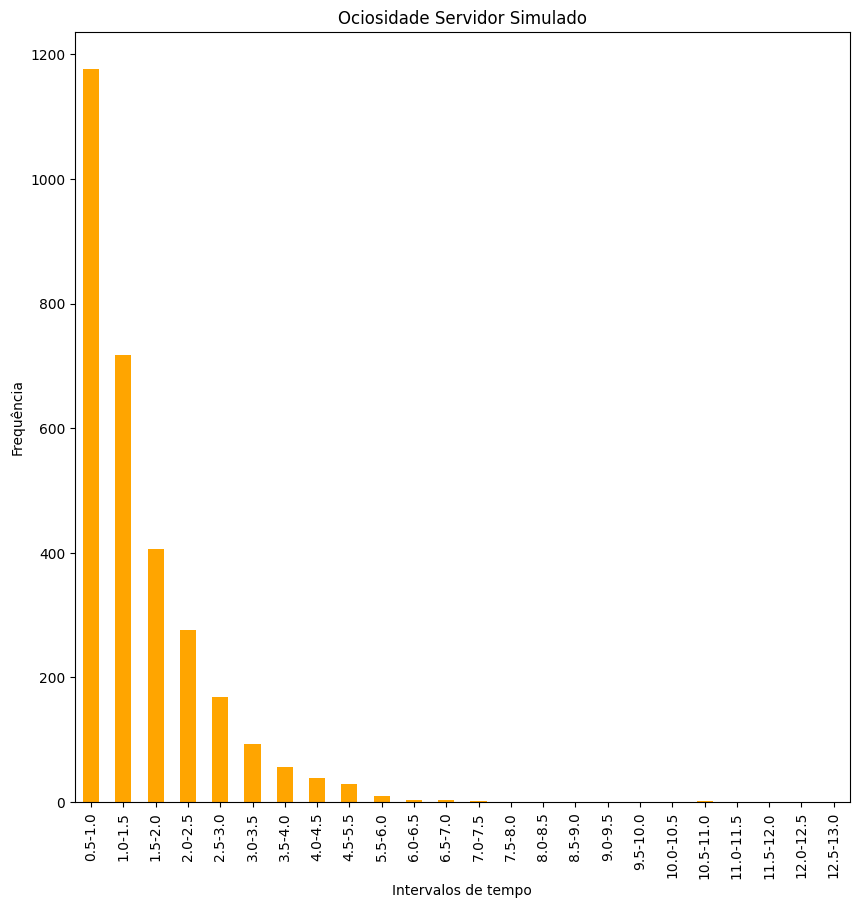

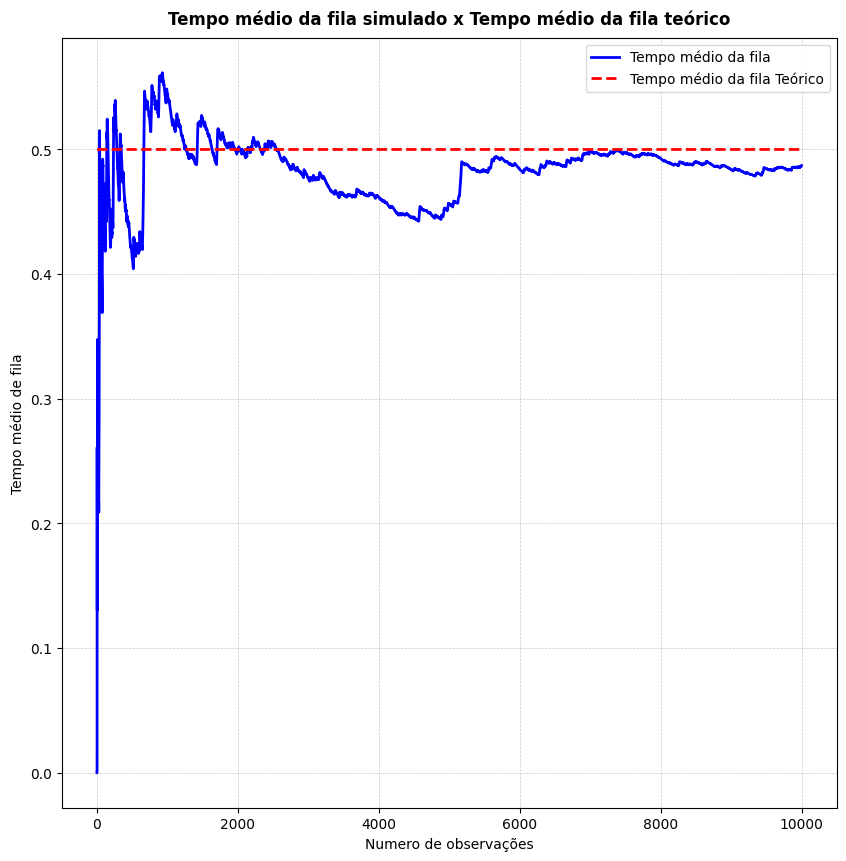

In [94]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_3,wq)


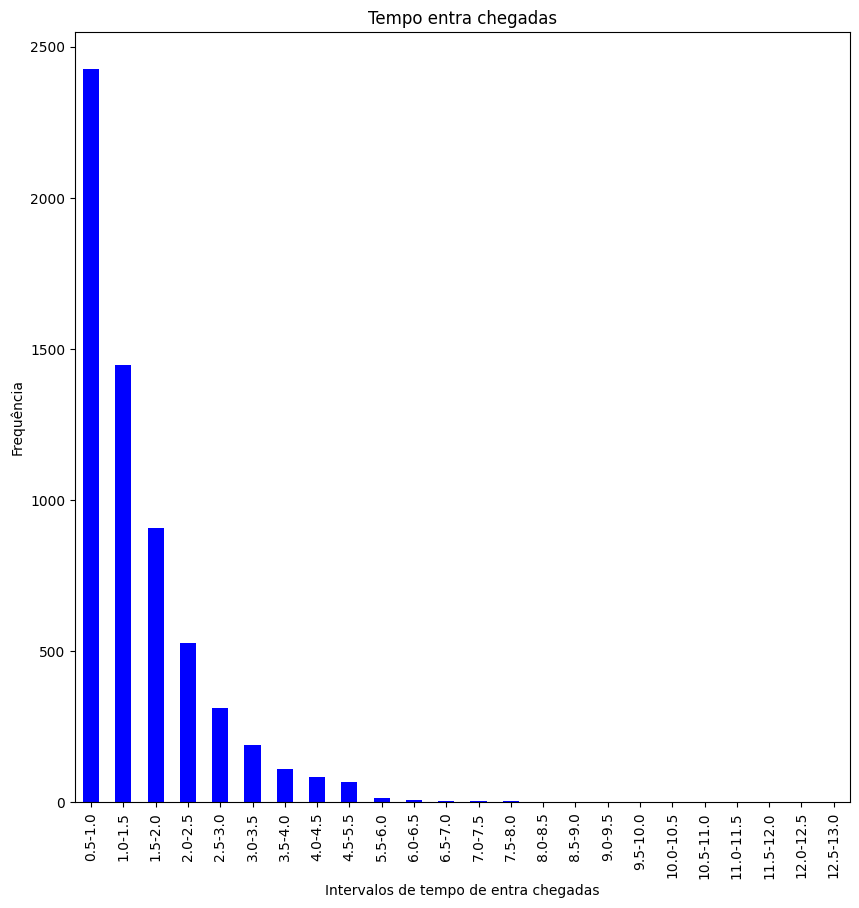

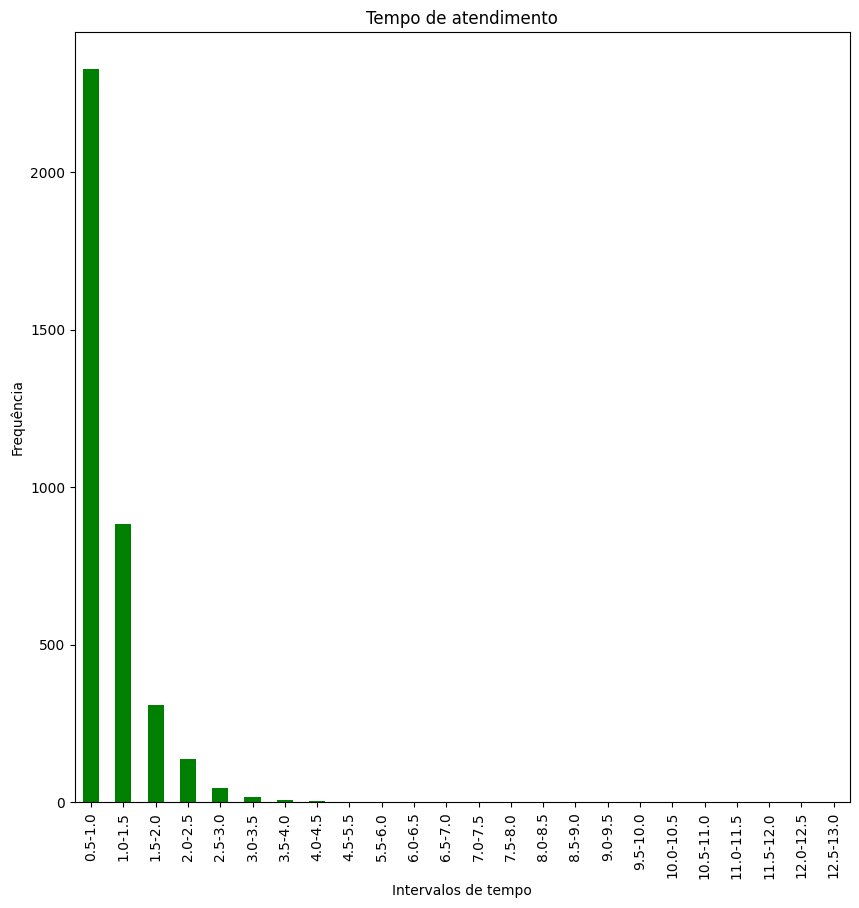

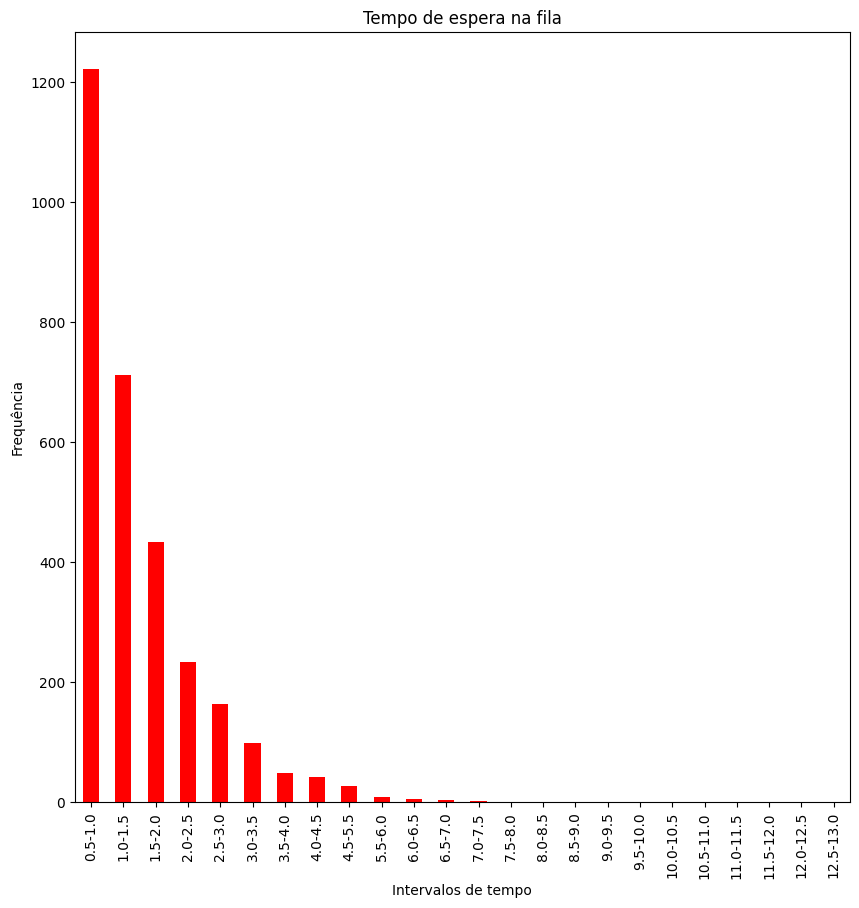

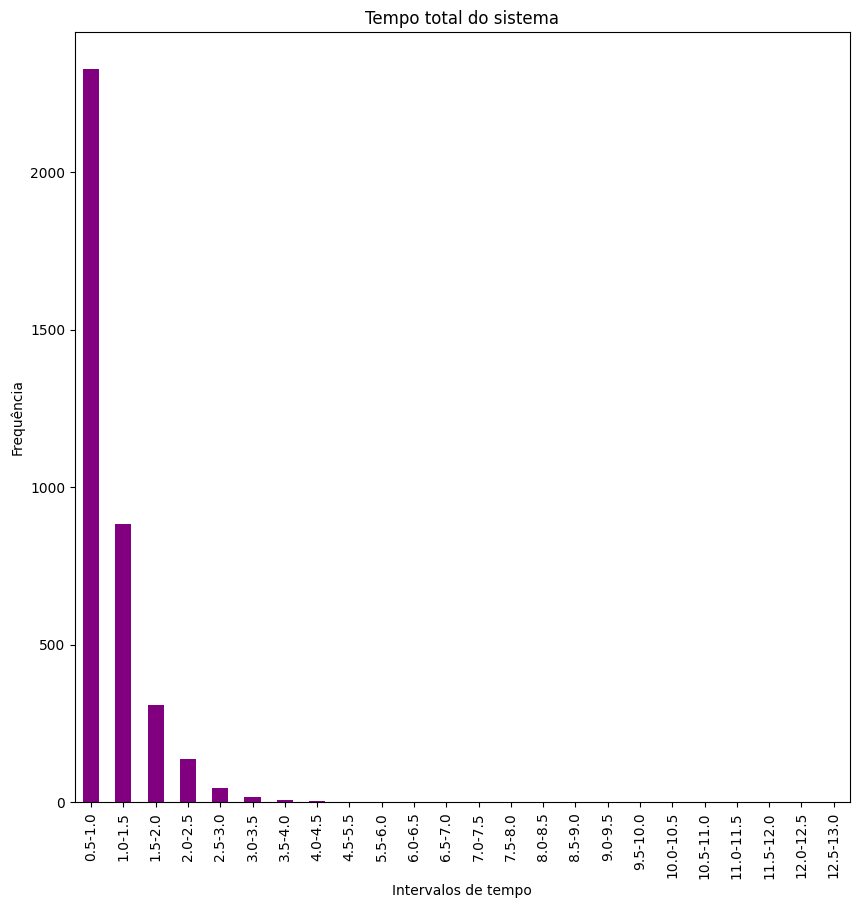

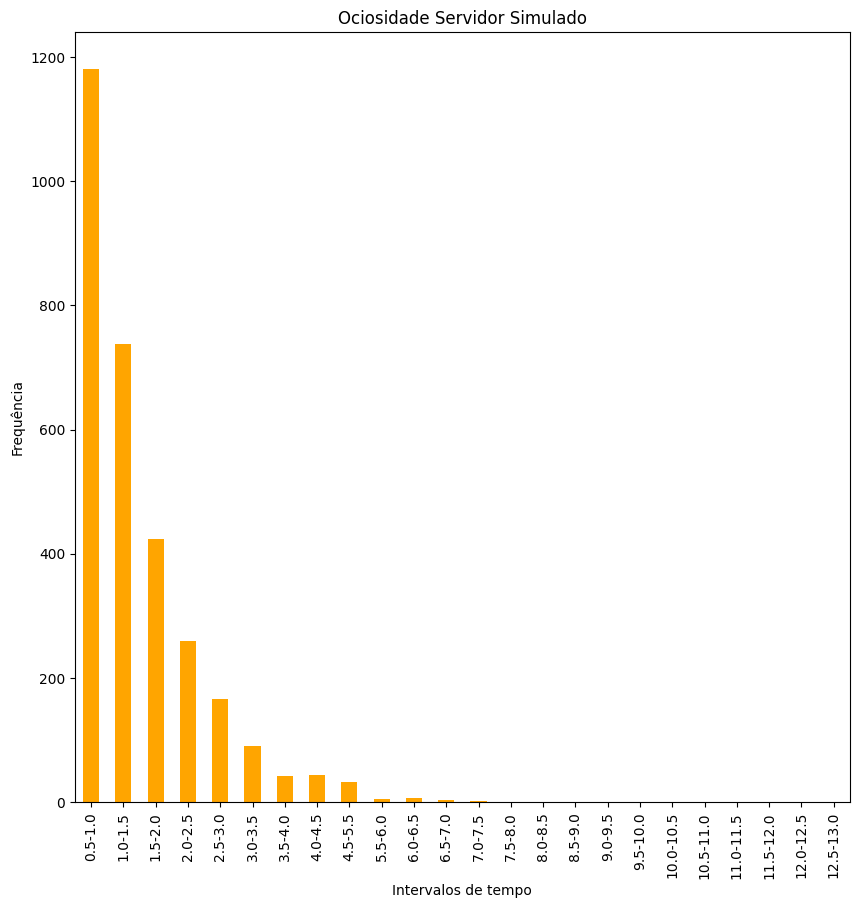

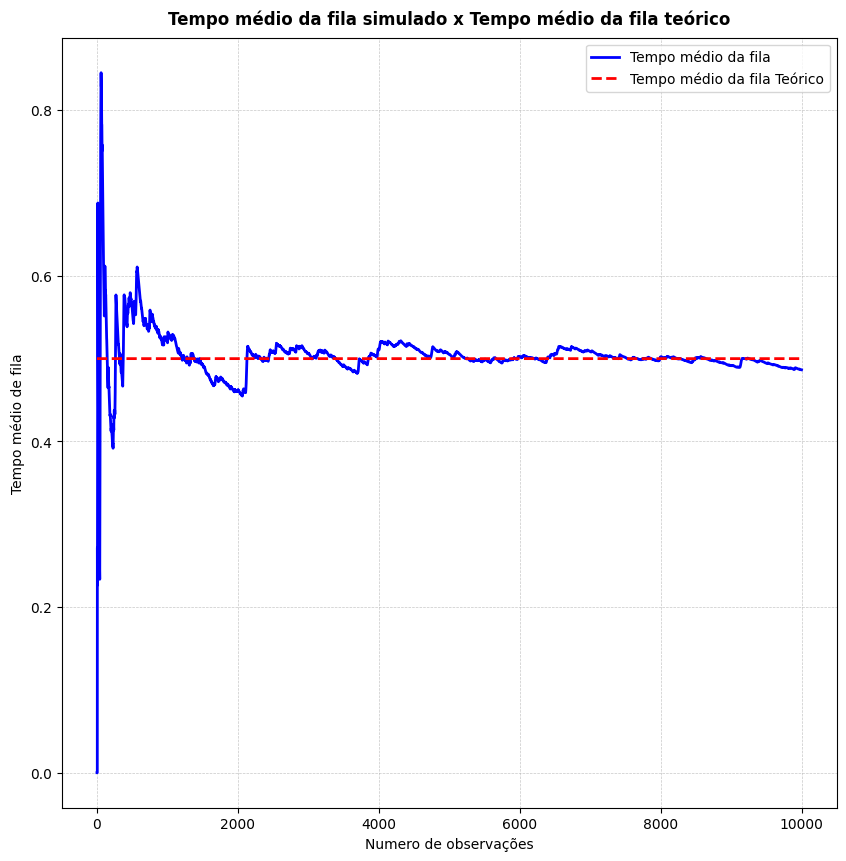

In [95]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_4,wq)


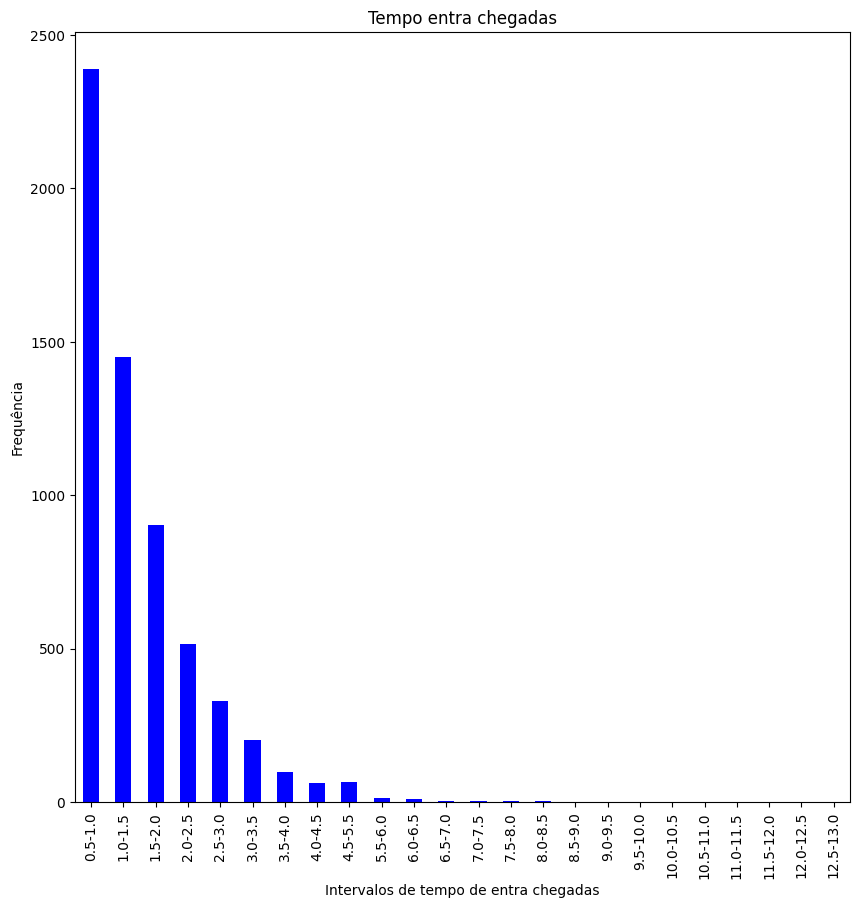

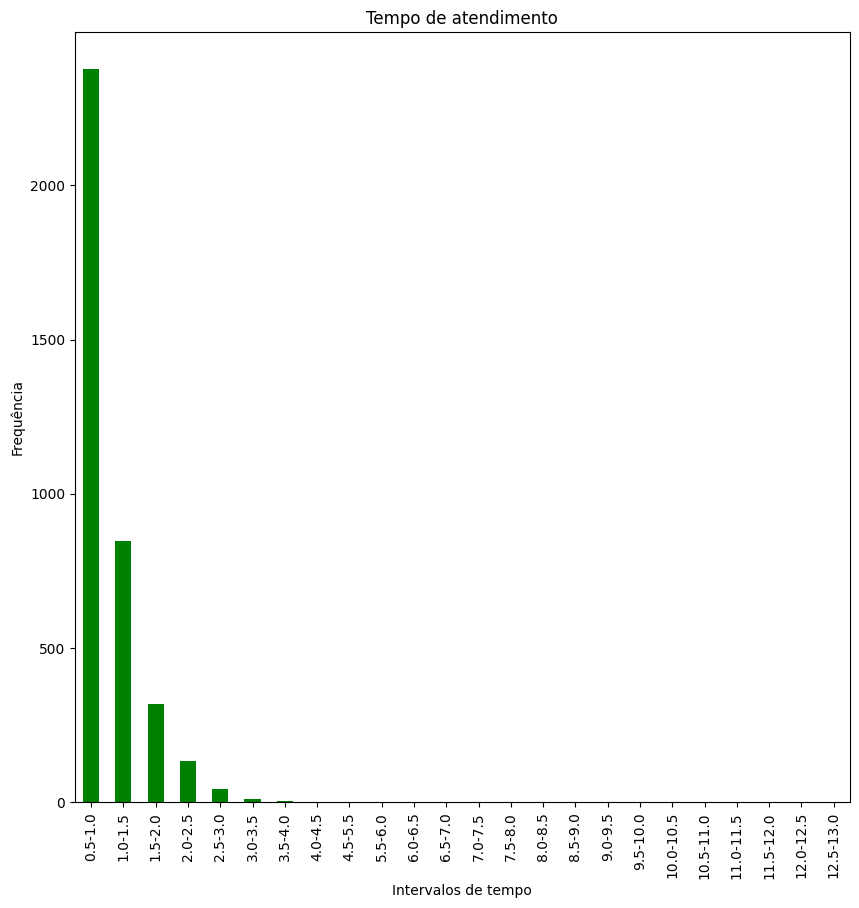

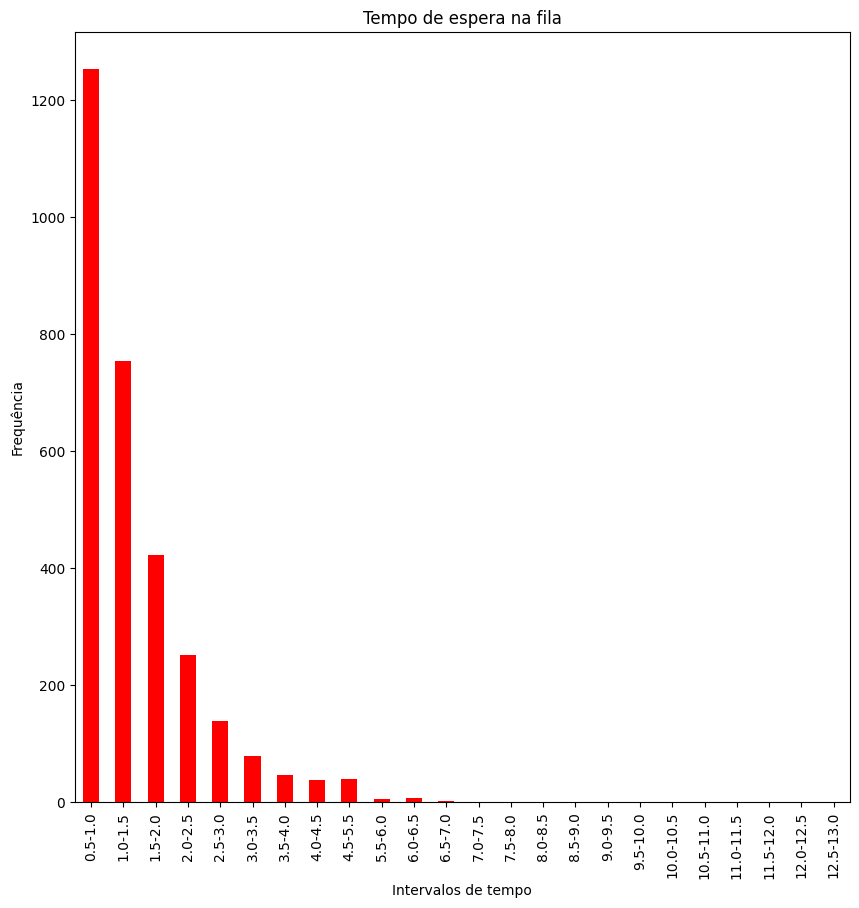

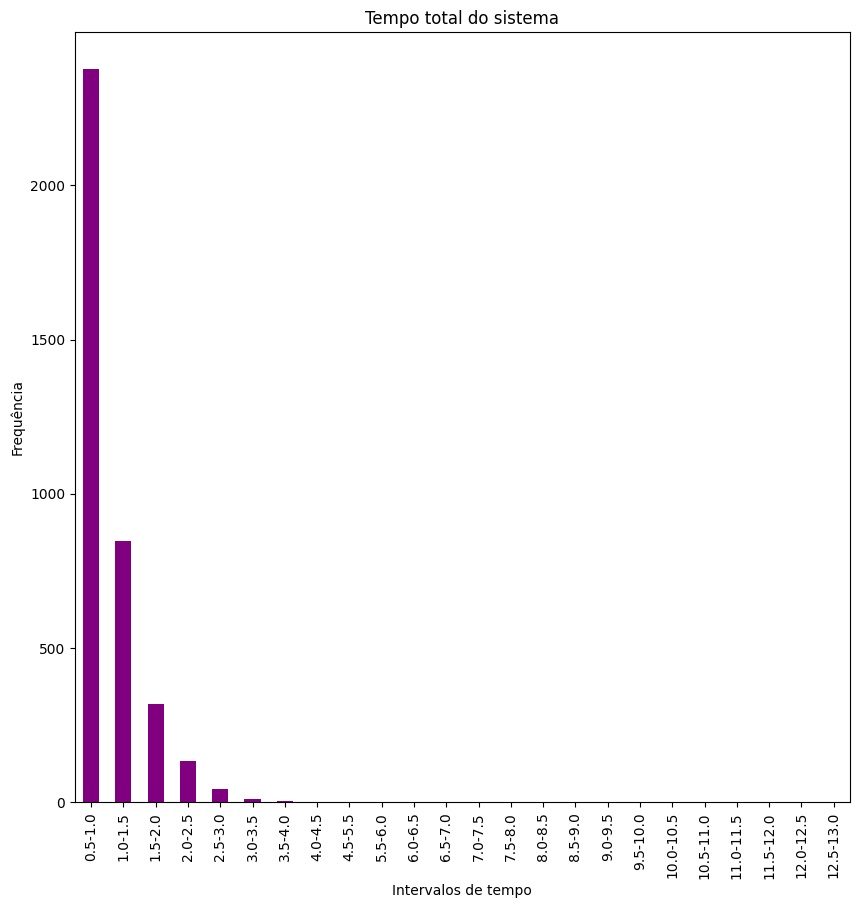

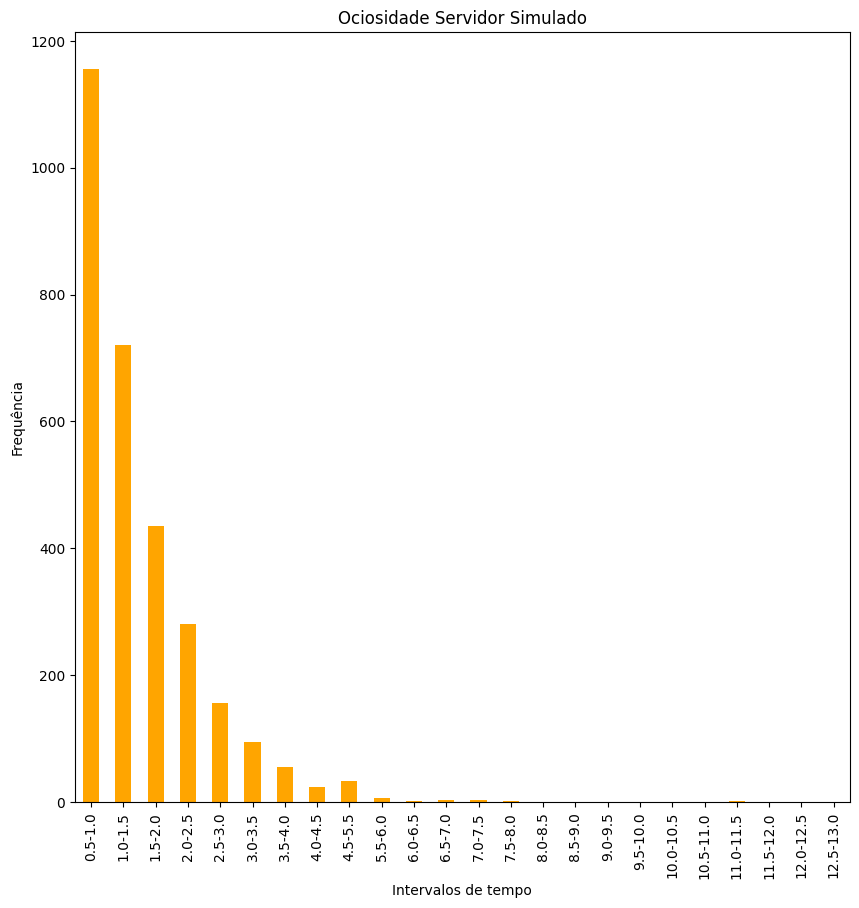

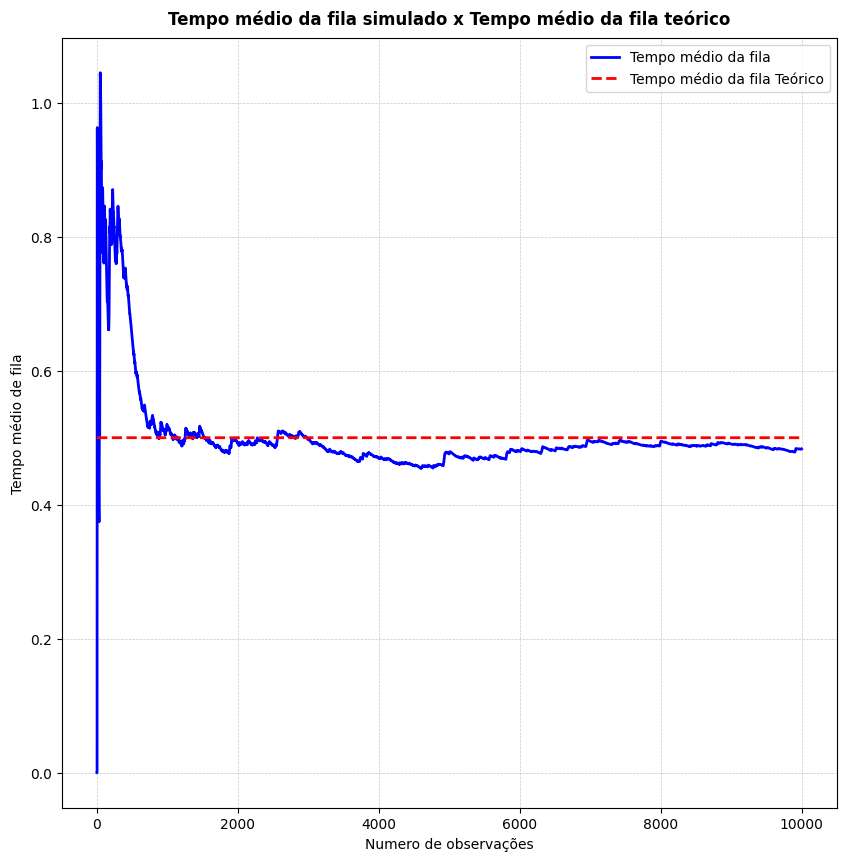

In [96]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_5,wq)

In [97]:
tempo_medio_espera_replicações = pd.DataFrame(columns=['Tempo entre chegadas' , 'λ' , 'μ' , 'Simulação 01', 'Simulação 02','Simulação 03' , 'Simulação 04' , 'Simulação 05' , 'w médio' , 'Variância' , 'Wq teórico'])

tempo_medio_ocupacao= pd.DataFrame(columns=['Tempo entre chegadas' , 'λ' , 'μ' , 'Simulação 01', 'Simulação 02','Simulação 03' , 'Simulação 04' , 'Simulação 05' ,  'p médio' ,  'Variância', 'p teorico'])




In [98]:

m_1 = dados_simulacao_1['Tempo de espera na fila'].mean()
m_2 = dados_simulacao_2['Tempo de espera na fila'].mean()
m_3 = dados_simulacao_3['Tempo de espera na fila'].mean()
m_4 = dados_simulacao_4['Tempo de espera na fila'].mean()
m_5 = dados_simulacao_5['Tempo de espera na fila'].mean()

m_1_ro = 1 - dados_simulacao_1["Ociosidade Servidor Simulado"].sum()/dados_simulacao_1['Fim de Atendimento'].tail(1).values[0]
m_2_ro = 1 - dados_simulacao_2["Ociosidade Servidor Simulado"].sum()/dados_simulacao_2['Fim de Atendimento'].tail(1).values[0]
m_3_ro = 1 - dados_simulacao_3["Ociosidade Servidor Simulado"].sum()/dados_simulacao_3['Fim de Atendimento'].tail(1).values[0]
m_4_ro = 1 - dados_simulacao_4["Ociosidade Servidor Simulado"].sum()/dados_simulacao_4['Fim de Atendimento'].tail(1).values[0]
m_5_ro = 1 - dados_simulacao_5["Ociosidade Servidor Simulado"].sum()/dados_simulacao_5['Fim de Atendimento'].tail(1).values[0]


media_tempo  =  (m_1 + m_2 + m_3 + m_4 + m_5) / 5

media_ocupacao = (m_1_ro + m_2_ro + m_3_ro + m_4_ro + m_5_ro) / 5

p = l/u

wq = l / (u * (u-l))

media = (media_tempo+wq)/2

variancia = (wq-media)**2 + (media_tempo-media)**2

media_ocup_var  = ( media_ocupacao+p)/2

variancia_ocupacao = (p-media_ocupacao)**2 + (media_ocupacao-media_ocup_var)**2



tempo_medio_espera_replicações.loc[0]=[1,l,u,m_1,m_2,m_3,m_4,m_5,media_tempo,variancia , wq ]

tempo_medio_ocupacao.loc[0]=[1,l,u,m_1_ro,m_2_ro,m_3_ro,m_4_ro,m_5_ro,media_ocupacao,variancia_ocupacao , p]

##tempo_medio_espera_replicações

##tempo_medio_ocupacao



In [99]:
j = 1



dados_simulacao_aux = []

for i in range (0,5):
    
  dados_simulacao_aux.append(pd.DataFrame(columns=dados_simulacao_1.columns))


for i in range (0,7):
    
    j = j -0.1
    l = 1 / j;
    
    m = []
    o = []
    
    p = l/u;



    
    for k in range (0,5):
      
      generate_simulation(dados_simulacao_aux[k])
      
      m.append(dados_simulacao_aux[k]['Tempo de espera na fila'].mean())
      o.append(1 - dados_simulacao_aux[k]["Ociosidade Servidor Simulado"].sum()/dados_simulacao_aux[k]['Fim de Atendimento'].tail(1).values[0])  

    media_tempo = sum(m)/5
    media_ocupacao = sum(o)/5
    
    
    wq = l / (u * (u-l))

    media = (media_tempo+wq)/2
   

    variancia = (wq-media)**2 + (media_tempo-media)**2
    
    media_ocup_var  = ( media_ocupacao+p)/2

    variancia_ocupacao = (p-media_ocupacao)**2 + (media_ocupacao-media_ocup_var)**2
    
    
    
    
    
    
    tempo_medio_espera_replicações.loc[i+1 , ['Tempo entre chegadas' , 'λ' , 'μ' ,'Simulação 01', 'Simulação 02' , 'Simulação 03', 'Simulação 04', 'Simulação 05', 'w médio' , 'Variância' , 'Wq teórico']]=[1,l,u,m[0],m[1],m[2],m[3],m[4], media_tempo,variancia , wq]
    
    tempo_medio_ocupacao.loc[i+1]=[1,l,u,o[0],o[1],o[2],o[3],o[4],media_ocupacao,variancia_ocupacao , p]



tempo_medio_ocupacao = tempo_medio_ocupacao.drop(index=[0])
tempo_medio_espera_replicações
  
    
    
    
    

,Tempo entre chegadas,λ,μ,Simulação 01,Simulação 02,Simulação 03,Simulação 04,Simulação 05,w médio,Variância,Wq teórico
0,1.0,1.000000,2.0,0.508759,0.535357,0.486962,0.486445,0.483006,0.500106,5.600697e-09,5.000000e-01
1,1.0,1.111111,2.0,0.593452,0.639365,0.652193,0.612612,0.634369,0.626398,9.775077e-07,6.250000e-01
2,1.0,1.250000,2.0,0.839972,0.903813,0.767594,0.827136,0.736980,0.815099,1.662482e-04,8.333333e-01
3,1.0,1.428571,2.0,1.008908,1.230582,1.322609,1.258502,1.343866,1.232893,1.463216e-04,1.250000e+00
4,1.0,1.666667,2.0,2.314630,2.641337,1.799087,2.393459,2.303154,2.290333,2.198003e-02,2.500000e+00
5,1.0,2.000000,2.0,15.428973,29.368496,53.793304,38.052452,18.145293,30.957704,2.535301e+30,2.251800e+15
6,1.0,2.500000,2.0,519.257768,571.455737,447.511395,450.038691,497.402985,497.133315,1.248167e+05,-2.500000e+00
7,1.0,3.333333,2.0,988.102024,964.800092,974.314595,952.282201,941.371112,964.174005,4.660218e+05,-1.250000e+00


In [100]:
tempo_medio_ocupacao

,Tempo entre chegadas,λ,μ,Simulação 01,Simulação 02,Simulação 03,Simulação 04,Simulação 05,p médio,Variância,p teorico
1,1.0,1.111111,2.0,0.547984,0.542953,0.563839,0.550030,0.562948,0.553551,0.000005,0.555556
2,1.0,1.250000,2.0,0.611672,0.631032,0.626791,0.619408,0.618010,0.621383,0.000016,0.625000
3,1.0,1.428571,2.0,0.682732,0.721484,0.716233,0.712514,0.718630,0.710319,0.000020,0.714286
4,1.0,1.666667,2.0,0.820427,0.836736,0.795902,0.823791,0.831984,0.821768,0.000167,0.833333
5,1.0,2.000000,2.0,0.974590,0.990418,0.997725,0.996586,0.970663,0.985996,0.000245,1.000000
6,1.0,2.500000,2.0,0.999698,0.999892,0.999724,0.999818,0.999747,0.999776,0.078265,1.250000
7,1.0,3.333333,2.0,0.999860,0.999732,0.999980,0.999858,0.999814,0.999849,0.555807,1.666667
